In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils import data
from torch.utils.data import DataLoader, TensorDataset, SubsetRandomSampler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [2]:
train_data = pd.DataFrame()

train_data['hysteresis'] = pd.read_csv('../dataset/2D/hysteresis_all_scaled_train.csv')['total']
train_data['id'] = pd.read_csv('../dataset/2D/idiq_all_scaled_train.csv')['id']
train_data['iq'] = pd.read_csv('../dataset/2D/idiq_all_scaled_train.csv')['iq']
train_data['joule'] = pd.read_csv('../dataset/2D/joule_all_scaled_train.csv')['total']
train_data['speed'] = pd.read_csv('../dataset/2D/speed_all_scaled_train.csv')['N']
train_data['d1'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_train.csv')['d1']
train_data['d2'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_train.csv')['d2']
train_data['d3'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_train.csv')['d3']
train_data['d4'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_train.csv')['d4']
train_data['d5'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_train.csv')['d5']
train_data['d6'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_train.csv')['d6']
train_data['d7'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_train.csv')['d7']
train_data['d8'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_train.csv')['d8']
train_data['d9'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_train.csv')['d9']
train_data['r1'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_train.csv')['r1']
train_data['t1'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_train.csv')['t1']

test_data = pd.DataFrame()

test_data['hysteresis'] = pd.read_csv('../dataset/2D/hysteresis_all_scaled_test.csv')['total']
test_data['id'] = pd.read_csv('../dataset/2D/idiq_all_scaled_test.csv')['id']
test_data['iq'] = pd.read_csv('../dataset/2D/idiq_all_scaled_test.csv')['iq']
test_data['joule'] = pd.read_csv('../dataset/2D/joule_all_scaled_test.csv')['total']
test_data['speed'] = pd.read_csv('../dataset/2D/speed_all_scaled_test.csv')['N']
test_data['d1'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_test.csv')['d1']
test_data['d2'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_test.csv')['d2']
test_data['d3'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_test.csv')['d3']
test_data['d4'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_test.csv')['d4']
test_data['d5'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_test.csv')['d5']
test_data['d6'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_test.csv')['d6']
test_data['d7'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_test.csv')['d7']
test_data['d8'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_test.csv')['d8']
test_data['d9'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_test.csv')['d9']
test_data['r1'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_test.csv')['r1']
test_data['t1'] = pd.read_csv('../dataset/2D/xgeom_all_scaled_test.csv')['t1']


In [3]:
class RegressionModel(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super().__init__() 
        self.linear = nn.Sequential(
            nn.Linear(input_dim, 5),
            nn.ReLU(),
            nn.Linear(5, 5),
            nn.ReLU(),
            nn.Linear(5, output_dim)
        )
        
    def forward(self, x):
        return self.linear(x)

In [4]:
target = ['hysteresis', 'joule']

input_dim = len(train_data.columns.drop(target))
output_dim = len(target)

model = RegressionModel(input_dim, output_dim)
print(model)

learning_rate = 0.5
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr = learning_rate) # GRADIENT DESCENT

RegressionModel(
  (linear): Sequential(
    (0): Linear(in_features=14, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=2, bias=True)
  )
)


In [5]:
X_train = torch.tensor(train_data.drop(columns = target).values, dtype=torch.float32)
y_train = torch.tensor(train_data[target].values, dtype=torch.float32)
X_test = torch.tensor(test_data.drop(columns = target).values, dtype=torch.float32)
y_test = torch.tensor(test_data[target].values, dtype=torch.float32)

In [6]:
# training steps

epoch = 500
losses = torch.zeros(epoch)


for i in range(epoch):
    pred = model(X_train) # predicting???

    loss = loss_func(pred, y_train)
    losses[i] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [13]:
y_pred = model(X_test)

In [14]:
print(f"Neural Network model results in Hysteresis loss for motor 2D")
print(f"Score: {r2_score(y_pred[:, 0].detach().numpy(), y_test[:, 0].detach().numpy(),)}")
print(f"Mean squared error: {mean_squared_error(y_pred[:, 0].detach().numpy(), y_test[:, 0].detach().numpy(),)}")
print(f"MAPE: {mean_absolute_percentage_error(y_pred[:, 0].detach().numpy(), y_test[:, 0].detach().numpy(),)}")

Neural Network model results in Hysteresis loss for motor 2D
Score: 0.9235516786575317
Mean squared error: 0.06946830451488495
MAPE: 0.922970712184906


In [15]:
print(f"Neural Network model results in Joule loss for motor 2D")
print(f"Score: {r2_score(y_pred[:, 1].detach().numpy(), y_test[:, 0].detach().numpy(),)}")
print(f"Mean squared error: {mean_squared_error(y_pred[:, 0].detach().numpy(), y_test[:, 1].detach().numpy(),)}")
print(f"MAPE: {mean_absolute_percentage_error(y_pred[:, 1].detach().numpy(), y_test[:, 1].detach().numpy(),)}")

Neural Network model results in Joule loss for motor 2D
Score: 0.7564380168914795
Mean squared error: 0.36857542395591736
MAPE: 0.8634419441223145


In [8]:
def obs_vs_pred (true_value, predicted_value, title = "No title"):
    plt.figure(figsize=(7, 7))
    plt.scatter(true_value, predicted_value, c='crimson')
    
    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlim(-3, 5)
    plt.ylim(-3, 5)
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.title(title, fontsize = 18)
    plt.show()

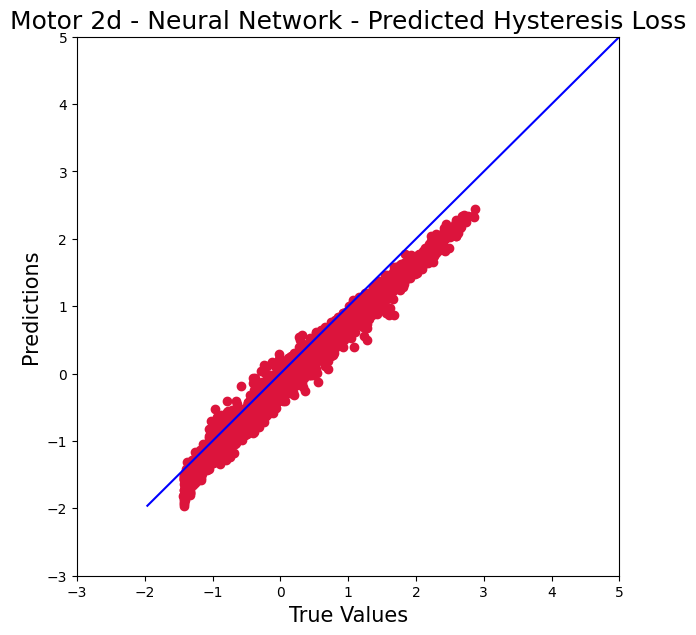

In [19]:
obs_vs_pred(y_test[:, 0].detach().numpy(), y_pred[:, 0].detach().numpy(), "Motor 2d - Neural Network - Predicted Hysteresis Loss")

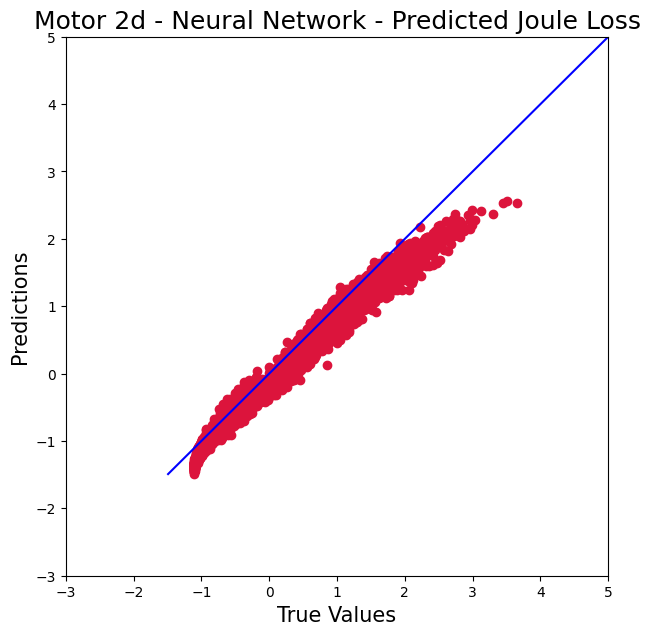

In [18]:
obs_vs_pred(y_test[:, 1].detach().numpy(), y_pred[:, 1].detach().numpy(), "Motor 2d - Neural Network - Predicted Joule Loss")